# CUSTOMER CHURN PREDICTION USING SMOTE

### Problem Statement

Our client,Telco is a company that provides home and internet service to 7043 customers in califonia.Data was provided by them on customers that have left their company(churned).Using data we want to gain insight into the factors thats driving customer churn,which will help them understand how to drive campaigns on customer retention and aid decision making in reducing customer churn.

### Data Overview

The data contains 7043 rows of unique customer information with twenty customer impute data.Customer data is divided into two categories: demographic data and services that they may or may not utilize.The demographic features includes the customers gender,whether or not they have a partner or dependents,and if they are senior citizens.Senior citizens are citizens that are 65years or older. The features associated with services includes if they are on monthly,one year or two years contract,how long the customer has been with telco in (months) and the type of phone,TV,or internet service that they use.
Our target variable for this analysis is 'Churn',its represented in 1's and 0's. One indicating that the customer has left the company(churned) and zero indicated that the customer is still with the company(did not Churn).
Because of how imbalanced our dataset is with majority of our data showing that the customer did not churn,SMOTE technique will be applied during model building.

### EXPLORATORY DATA ANALYSIS(EDA)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df = dataset.copy()

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no missing values in our data

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
dataset.drop(['customerID'],axis=1,inplace = True)

CustomerID will not be useful or provide any useful information during our analysis,on this basis it was dropped.

In [9]:
dataset.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [10]:
dataset.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
dataset['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [13]:
dataset['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [14]:
gender_summary = df.groupby('gender',as_index=False).agg(gender_count = ('gender','count'),
                                          avg_tenure = ('tenure','mean'),
                                          monthly_avg=('MonthlyCharges','mean'))
                                         
print(gender_summary)                                       

   gender  gender_count  avg_tenure  monthly_avg
0  Female          3488   32.244553    65.204243
1    Male          3555   32.495359    64.327482


In [15]:
dataset['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [16]:
dataset['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [17]:
dataset['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [18]:
dataset['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [19]:
dataset['Churn'].value_counts(normalize = True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

There are more retained customers than there are customers that churned.About 73% of customers did not churn while about 26% churned.

## Important factor that contributes to the high retention rate?

Every customer has a value it adds to a company therefore companies are working hard to ensure their customers are retained. Customer lifetime value is the net profit earned over the course of a company’s relationship with the customer. In order to maximize customer lifetime value, a company must not only convince customers to buy its product or service once; it must also retain them.What are the most important features that will likely contribute to high retention rate?

In [20]:
#lets see the relationship between contracts and customer churn
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

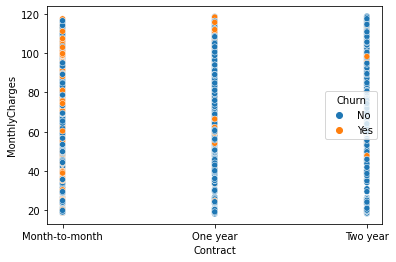

In [21]:
sns.scatterplot(data=dataset,
         x='Contract',
         y='MonthlyCharges',
         hue='Churn')

plt.show()

From the scatterplot it eveident that most customers that churned where on Month-to-Month contract. This can be prevented by encouraging more customers to do a one year contract by reducing its cost so more customers will go for this option.

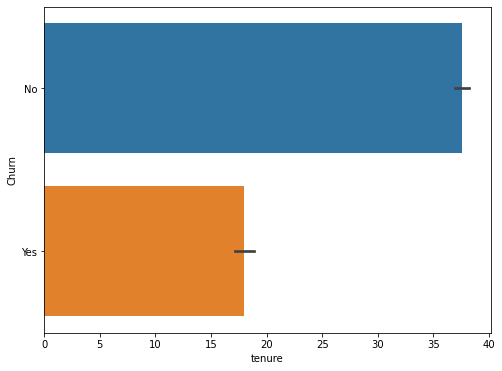

In [22]:
plt.figure(figsize=(8,6))
sns.barplot(x='tenure', y='Churn',data=dataset);

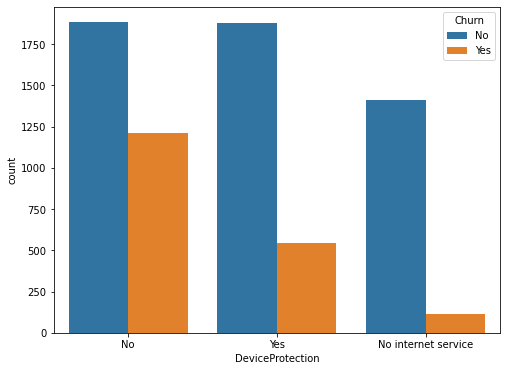

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(x='DeviceProtection', hue='Churn',data=dataset);

This plot shows that people with device protection are less likely to churn,while those without device protection are more prone to churn. This is understandable because most device care plans run for about a year,this will most likely keep the customer within this time range.

Lets find out the average tenure does with device protetion stay for

In [24]:
DeviceProtection_tenure = dataset.groupby('DeviceProtection',as_index = False )['tenure'].mean()
print(DeviceProtection_tenure)

      DeviceProtection     tenure
0                   No  23.696931
1  No internet service  30.547182
2                  Yes  44.604872


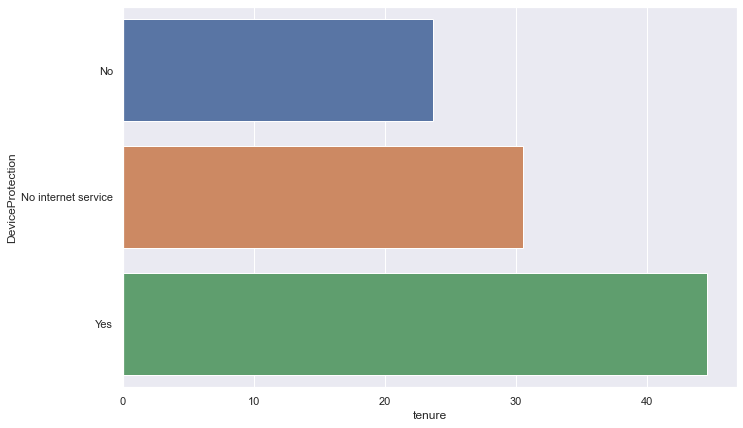

In [25]:
sns.set()
# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners 
ax = sns.barplot(x='tenure',y='DeviceProtection',data= DeviceProtection_tenure)

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
# ... YOUR CODE FOR TASK 4 ...

lets find out the percentage of customers that stayed out of those using device protection

In [26]:
Device_Protection_Yes = dataset[(dataset['DeviceProtection']=='Yes')]
Device_Protection_Yes

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7036,Female,0,No,No,12,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


<AxesSubplot:xlabel='Churn', ylabel='count'>

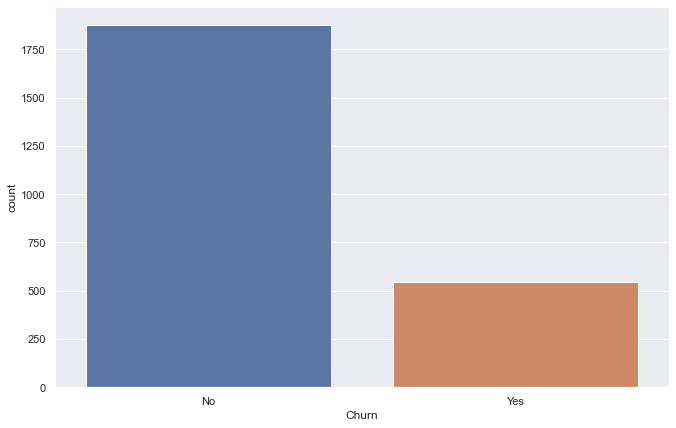

In [27]:
sns.countplot(x='Churn',data=Device_Protection_Yes)

In [28]:
Device_Protection_Yes['Churn'].value_counts(normalize=True)

No     0.774979
Yes    0.225021
Name: Churn, dtype: float64

<AxesSubplot:xlabel='Churn', ylabel='count'>

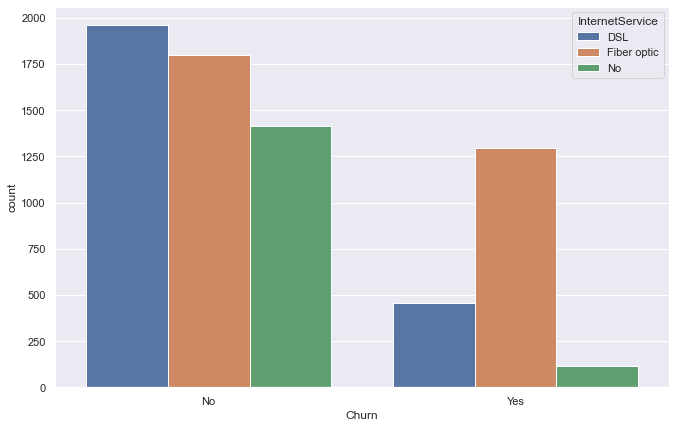

In [29]:
sns.countplot(x='Churn',data=dataset,hue='InternetService')

Majority of customers that use Fibre optic internet service churned. This could most likely be due to poor service by this could result from poor internet service by this service provider.There could be a couple of more reasons why customers using Fiber optic churned.
reasons could be:
1. Fibre optics contract charges might be high
2. Poor tech support
3. e.t.c

<AxesSubplot:xlabel='Churn', ylabel='count'>

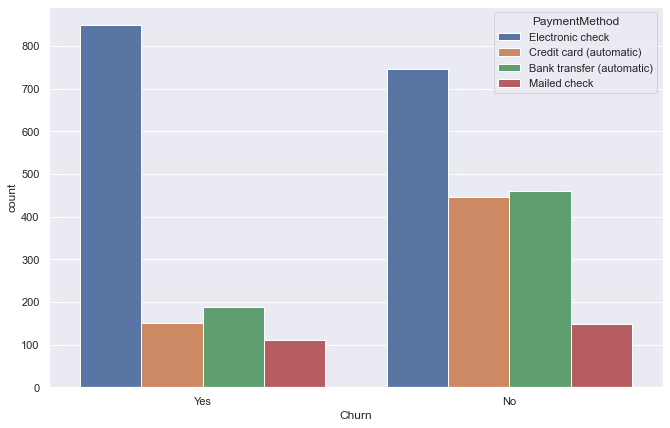

In [30]:
sns.countplot(x='Churn',data=dataset[dataset['InternetService']=='Fiber optic'],hue='PaymentMethod')

<AxesSubplot:xlabel='Churn', ylabel='count'>

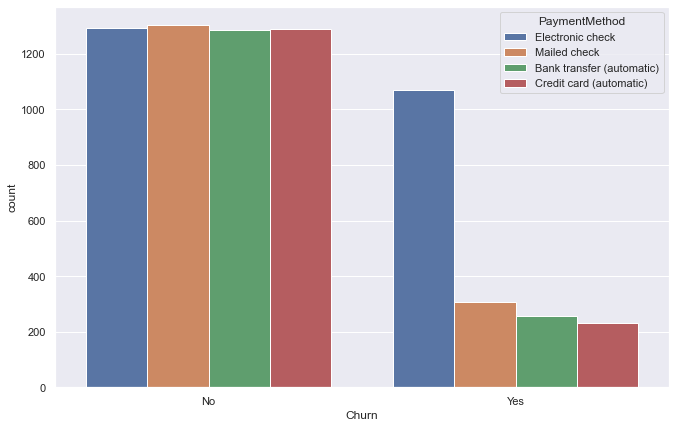

In [31]:
sns.countplot(x='Churn',data=dataset ,hue='PaymentMethod')

From the plot its evident that a customer using electronic cheque is more likely to churn than those using other methods of payment. Electronic checks are prone to Errors and reduced float.The computer driven nature of electronic checks makes them subject to computer errors.Aglich in the processing of this check could result in a double withdrawl.
Customers of Fiber optic internet service could be facing some of this issues. This customers could be sensitised on other ways to make seamless payments.

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

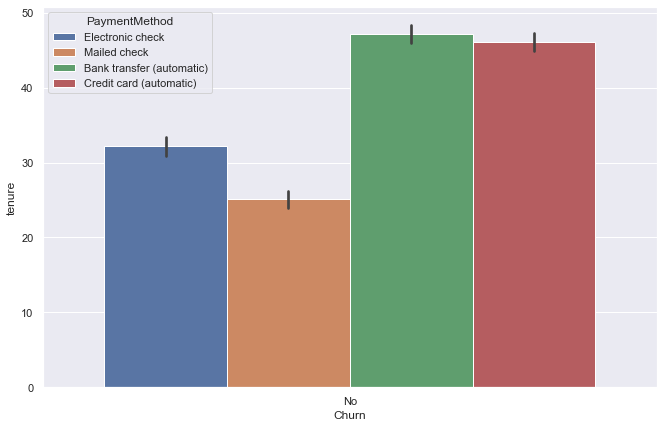

In [32]:
sns.barplot(x='Churn',y='tenure',data=dataset[dataset['Churn']=='No'],hue='PaymentMethod')

Customers using automatic bank transfers and Credit card are less likely to churn. Customers using electronic cheques could be sensitized on this method of payments.

In [33]:
monthly_charge_churn = dataset.groupby('Churn')['MonthlyCharges'].mean()
monthly_charge_churn

Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64

<AxesSubplot:xlabel='Churn', ylabel='count'>

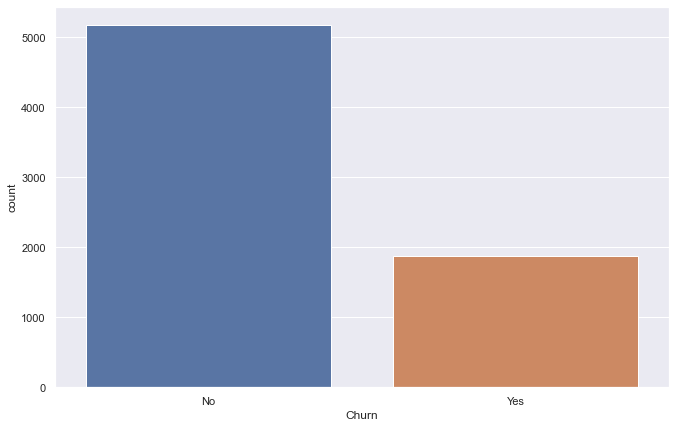

In [34]:
sns.countplot(x='Churn',data=dataset)

<AxesSubplot:xlabel='Churn', ylabel='count'>

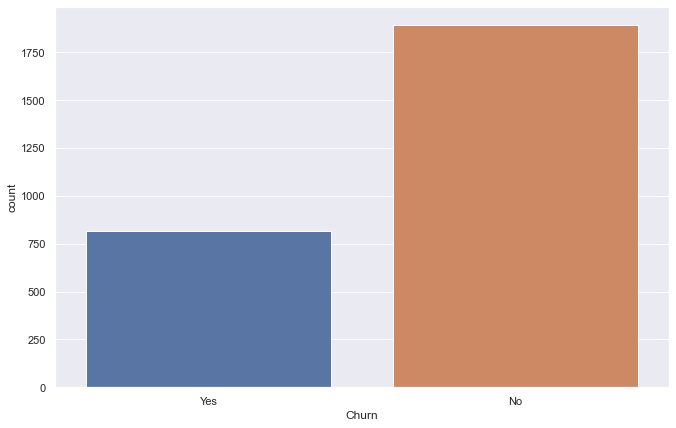

In [35]:
sns.countplot(x='Churn',data=dataset[dataset['StreamingTV']=='Yes'])

##### Visualize the gender the churn out of both male and female ?

<AxesSubplot:xlabel='gender', ylabel='count'>

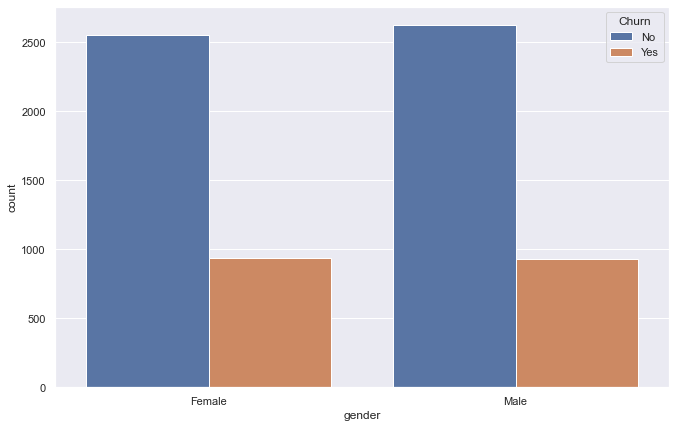

In [36]:
sns.countplot(x='gender',data=dataset ,hue='Churn')

array([<AxesSubplot:title={'center':'tenure'}>,
       <AxesSubplot:title={'center':'MonthlyCharges'}>], dtype=object)

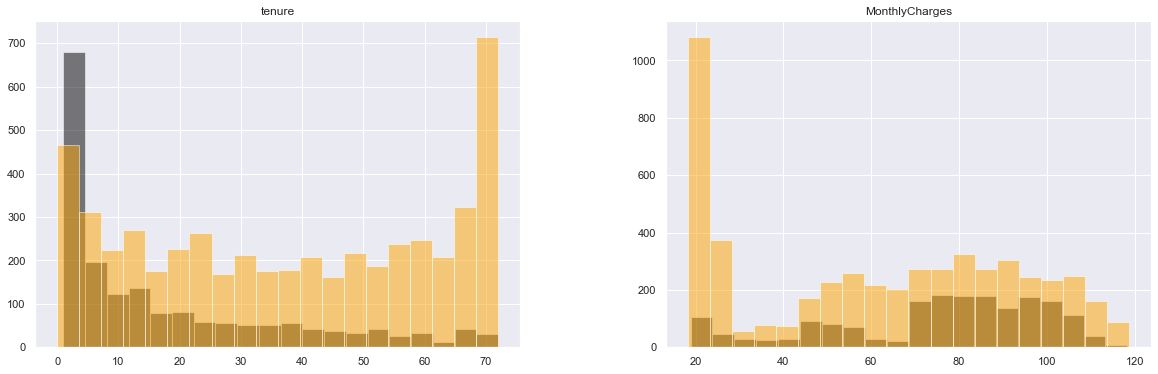

In [37]:
numerical_features=['tenure','MonthlyCharges']
fig,ax = plt.subplots(1,2,figsize=(20,6))
df[df.Churn=='Yes'][numerical_features].hist(bins=20,color='black',alpha=0.5,ax=ax)
df[df.Churn=='No'][numerical_features].hist(bins=20,color='orange',alpha=0.5,ax=ax)


From the plot it can be seen that as tenure increase so does the likely hood of customer churning decreases. Customers with higher monthly spend of 70 to 100 dollars are more likely to churn compared to customers that spend way less of between $20 to $30. Most customers that did not churned have high tenure of about 70months.

In [38]:
#let's dive deeper by checking what service customers that have stayed for 70 and above years utilize the most

tenure_70_above = dataset[dataset['tenure']>= 70]
tenure_70_above

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
17,Male,0,No,Yes,71,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7382.25,No
28,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),90.25,6369.45,No
30,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No
35,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,No,Two year,No,Bank transfer (automatic),99.90,7251.7,No
41,Female,0,Yes,Yes,70,Yes,Yes,DSL,Yes,Yes,No,No,Yes,No,Two year,Yes,Credit card (automatic),69.20,4872.35,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Male,0,Yes,Yes,71,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,Bank transfer (automatic),100.55,7113.75,No
7007,Male,1,Yes,No,72,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),63.10,4685.55,No
7022,Male,0,No,No,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,104.95,7544.3,No
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No


In [39]:
dataset.shape[0]

7043

In [40]:
tenure_70_above.shape[0]

651

In [41]:
percentage_70_above = (tenure_70_above.shape[0]/dataset.shape[0])*100
print('Percentage of customers with tenure for 70 and above:',percentage_70_above)

Percentage of customers with tenure for 70 and above: 9.243220218656823


<AxesSubplot:xlabel='InternetService', ylabel='count'>

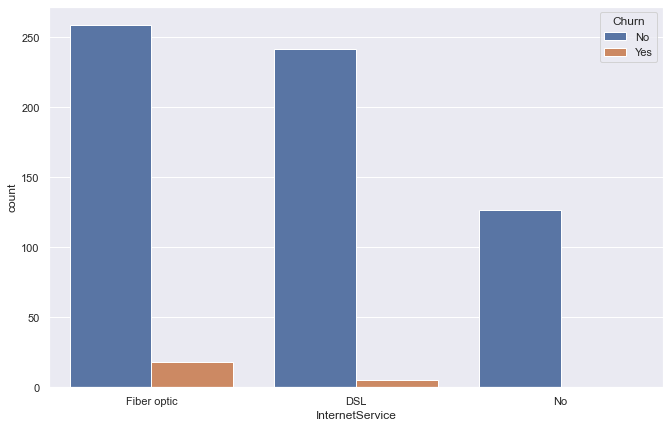

In [42]:
sns.countplot(x='InternetService',data=tenure_70_above,hue='Churn')

Customers that have stayed with the company within 70 months and above mostly use Fibre optic.From our previous analysis generally most customers that left the company used Fibre Optic.This is interesting to see.Lets investige the payment method they use for payment and the contract they subscribed to.

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

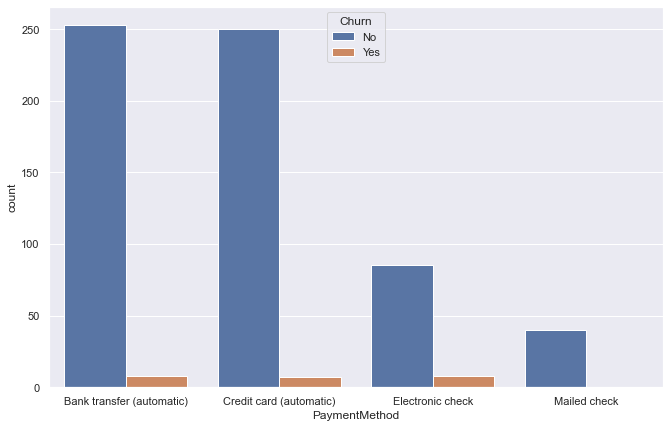

In [43]:
sns.countplot(x='PaymentMethod',data=tenure_70_above,hue='Churn')

Bank transfer and credit card transfer from the plot seems like the most preferred way to perform transactions for customers that have stayed for 70months. 
lets also find out the kind of contract they are on.

<AxesSubplot:xlabel='Contract', ylabel='count'>

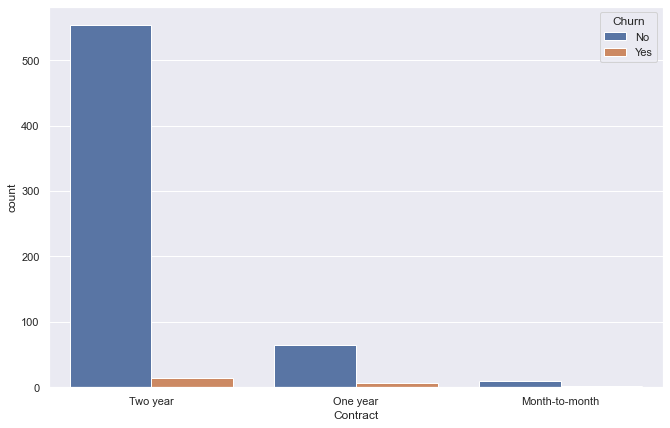

In [44]:
sns.countplot(x='Contract',data=tenure_70_above,hue='Churn')

A good number of this customers are ona a 2 year contract. Measures should be taking by the comapny to make more customers subscribe to the two yaer contract,most likely by giving a discount.

## PREPROCESSING

In [45]:
#importing the required libaries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [46]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [47]:
#looking at number of rows an columns in dataset
dataset.shape

(7043, 20)

In [48]:
#converting non-numeric columns to numeric

#initializing an object of class LabelEncoder
labelencoder = LabelEncoder()


for column in dataset:
    if dataset[column].dtype == np.number:
        continue
    dataset[column] = labelencoder.fit_transform(dataset[column])

<ipython-input-48-c328bf412f5d>:8: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dataset[column].dtype == np.number:


In [49]:
#show new dataset datatype
dataset.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

In [50]:
#show first five rows
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [51]:
#scale the data

X = dataset.drop('Churn',axis=1)
y = dataset['Churn']

In [52]:
X = StandardScaler().fit_transform(X)

In [53]:
#split data into test  and train
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [54]:
#creating the model
model = LogisticRegression()
#training the model
model.fit(x_train,y_train)

LogisticRegression()

In [55]:
#predictions
predictions = model.predict(x_test)
#print predictions
print(predictions)

[1 0 0 ... 0 0 0]


In [56]:
#check prediction,recall and f1 score
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [57]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

0.8161816891412349


In [58]:
pd.crosstab(y_test,predictions)

col_0,0,1
Churn,,
0,940,96
1,163,210


### APPLYING SMOTE TECHNIQUE

In [59]:
#lets improve our model using SMOTE to get a more balanced dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [60]:
x_train_smote,y_train_smote = smote.fit_resample(x_train.astype('float'),y_train)

In [61]:
from collections import Counter

In [62]:
print('Before SMOTE :', Counter(y_train))
print('AFTER SMOTE :' , Counter(y_train_smote))

Before SMOTE : Counter({0: 4138, 1: 1496})
AFTER SMOTE : Counter({0: 4138, 1: 4138})


### USING LOGISTIC REGRESSION ON THE SMOTE DATA

In [63]:
model.fit(x_train_smote,y_train_smote)
prediction2 = model.predict(x_test)
print(accuracy_score(y_test,prediction2))

0.758694109297374


In [64]:
pd.crosstab(y_test,prediction2)

col_0,0,1
Churn,,
0,762,274
1,66,307


##### Although the accuracy score reduced from 81% to 75%,business wise this model willl work better.This model was able to predict customers that will churn more accurately than when we used an imbalanced dataset

#### FEATURE SELECTION TO IMPROVE OUR MODEL

In [65]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [66]:
dataset_filter = dataset.copy()

In [67]:
dataset_filter.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0


### CORRELATION COEFFICIENT:

<AxesSubplot:>

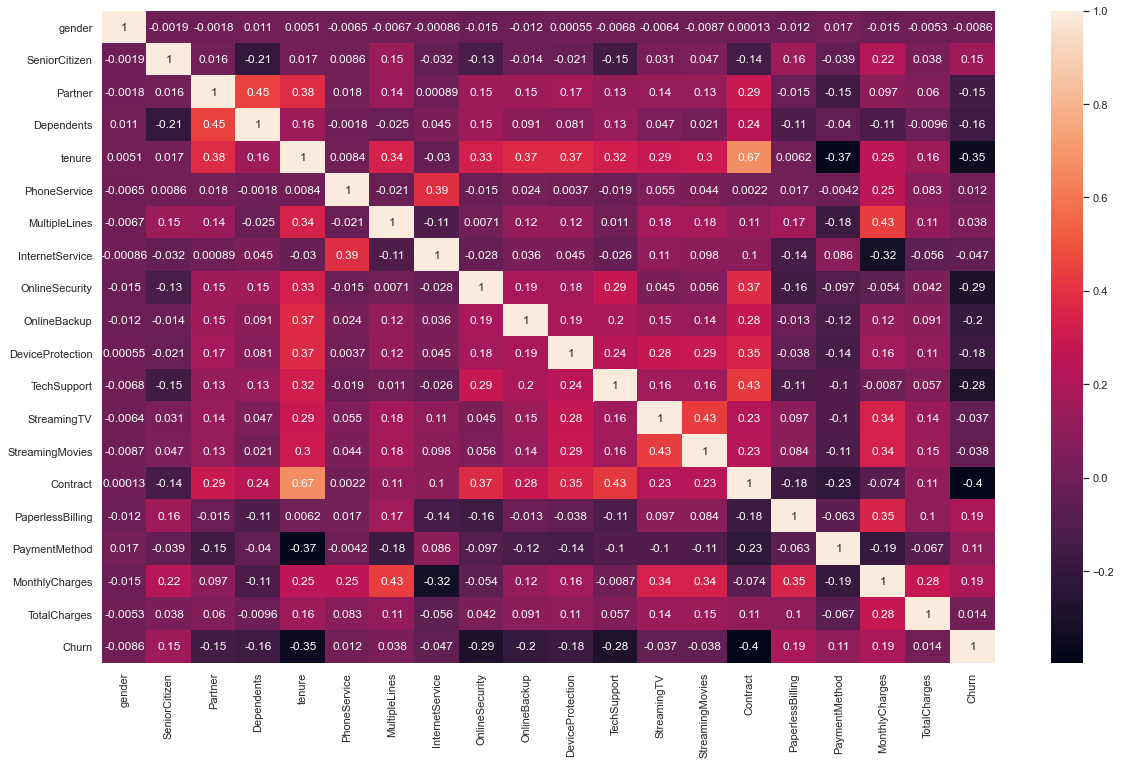

In [68]:
#correlation matrix
cor = dataset_filter.corr()

#plotting the heat map
plt.figure(figsize = (20,12))
sns.heatmap(cor,annot=True)

### FEATURE SELECTION BY FILTER METHOD (Information Gain)

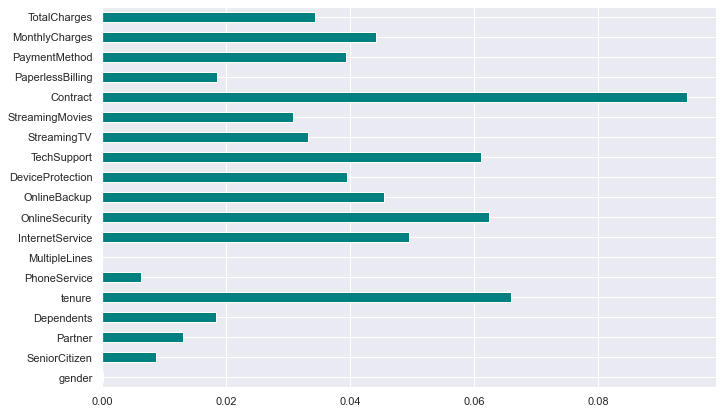

In [69]:
from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(X,y)
feat_importances = pd.Series(importances,dataset_filter.columns[0:len(dataset.columns)-1])
feat_importances.plot(kind='barh',color='teal')
plt.show()


In [70]:
#SELECTING FEATUES WITH HIGH IMPORTANCE OF 0.5 AND ABOVE
relevant_features = feat_importances[feat_importances >= 0.05]
relevant_features


tenure            0.065934
OnlineSecurity    0.062419
TechSupport       0.061169
Contract          0.094322
dtype: float64

In [71]:
list_relevant_features = list(relevant_features.index)
list_relevant_features

['tenure', 'OnlineSecurity', 'TechSupport', 'Contract']

In [72]:
type(relevant_features)

pandas.core.series.Series

In [73]:
dataset_filter = dataset_filter[list_relevant_features]
dataset_filter

,tenure,OnlineSecurity,TechSupport,Contract
0,1,0,0,0
1,34,2,0,1
2,2,2,0,0
3,45,2,2,1
4,2,0,0,0
...,...,...,...,...
7038,24,2,2,1
7039,72,0,0,1
7040,11,2,0,0
7041,4,0,0,0


In [74]:
X = dataset_filter
y = dataset['Churn']

In [75]:
#split data into test  and train
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=42)

##### APPLYING SMOTE

In [76]:
x_train_smote,y_train_smote = smote.fit_resample(x_train.astype('float'),y_train)

In [77]:
#creating the model
model1 = LogisticRegression()
#training the model
model1.fit(x_train_smote,y_train_smote)

LogisticRegression()

In [78]:
#predictions
predictions = model1.predict(x_test)
#print predictions
print(predictions)

[1 1 0 ... 0 0 1]


In [79]:
#check prediction,recall and f1 score
from sklearn.metrics import classification_report

In [80]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

0.6827537260468417


In [81]:
pd.crosstab(y_test,predictions)

col_0,0,1
Churn,,
0,639,397
1,50,323


print(classification_report(y_test,predictions))

### APPLYING NAVIES BAYES 

In [82]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()

In [83]:
model_nb.fit(x_train_smote,y_train_smote)

GaussianNB()

In [84]:
#predictions
predictions_nb = model_nb.predict(x_test)
#print predictions
print(predictions_nb)

[1 1 0 ... 0 0 1]


In [85]:
print(accuracy_score(y_test,predictions_nb))

0.6841731724627396


In [ ]:
pd.crosstab(y_test,prediction_nb)

### RANDOM FOREST CLASSIFIER

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
model_RF = RandomForestClassifier()

In [88]:
model_RF.fit(x_train_smote,y_train_smote)

RandomForestClassifier()

In [89]:
prediction_RF = model_RF.predict(x_test)
print(prediction_RF)

[1 0 0 ... 0 0 1]


In [90]:
print(accuracy_score(y_test,prediction_RF))

0.7267565649396736


In [91]:
pd.crosstab(y_test,prediction_RF)

col_0,0,1
Churn,,
0,743,293
1,92,281


In [92]:
print(classification_report(y_test,prediction_RF))

              precision    recall  f1-score   support

           0       0.89      0.72      0.79      1036
           1       0.49      0.75      0.59       373

    accuracy                           0.73      1409
   macro avg       0.69      0.74      0.69      1409
weighted avg       0.78      0.73      0.74      1409



### DECISION TREE

In [93]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_smote = sc.fit_transform(x_train_smote)
x_test = sc.transform(x_test)

In [94]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 12)
classifier.fit(x_train_smote, y_train_smote)

DecisionTreeClassifier(criterion='entropy', random_state=12)

In [95]:
prediction_DT = classifier.predict(x_test)

In [96]:
print(accuracy_score(y_test,prediction_DT))

0.7352732434350603


In [97]:
pd.crosstab(y_test,prediction_DT)

col_0,0,1
Churn,,
0,761,275
1,98,275


So far this model has given best results.Type II error is minimal copared to other models.
Business wise,according to the crosstab analysis the model predicted 275 customers that churned(left the company) incorrectly. Although this number seems high compared to the other models this is by far the best for now

### SVC

In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_smote = sc.fit_transform(x_train_smote)
x_test = sc.transform(x_test)

In [99]:
from sklearn.svm import SVC
model_SVC = SVC(kernel = 'rbf')
model_SVC.fit(x_train_smote, y_train_smote)

SVC()

In [100]:
prediction_SVC = model_SVC.predict(x_test)
prediction_SVC

array([1, 0, 0, ..., 0, 0, 1])

In [101]:
print(accuracy_score(y_test,prediction_SVC))

0.7345635202271115


In [102]:
pd.crosstab(y_test,prediction_SVC)

col_0,0,1
Churn,,
0,727,309
1,65,308


In [103]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction_SVC)

array([[727, 309],
       [ 65, 308]], dtype=int64)

### HYPER PARAMETER TUNNING OF THE SVC CLASSIFIER

##### APPLYING K-FOLD CROSS VALIDATION

In [104]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model_SVC, X= x_train_smote, y= y_train_smote ,cv= 10)
print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))

Accuracy: 75.86 %
Standard Deviation: 1.70 %


In [105]:
print(model_SVC.get_params().keys())

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])


In [106]:
prediction_SVC = model_SVC.predict(x_test)
prediction_SVC

array([1, 0, 0, ..., 0, 0, 1])

In [107]:
print(accuracy_score(y_test,prediction_SVC))

0.7345635202271115


In [108]:
pd.crosstab(y_test,prediction_SVC)

col_0,0,1
Churn,,
0,727,309
1,65,308


In [109]:
classifiers = [('logistic regression',model),('SVM',model_SVC),('Decision tree',classifier),('random forest',model_RF)]

In [110]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(x_train_smote, y_train_smote)   

# Evaluate the test set predictions
y_pred = vc.predict(x_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.745


In [111]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Churn,,
0,772,264
1,95,278


Best model is the decision tree classifier model with accuracy of 73.5%

### CONCLUSION

1. most customers that churned were on month to month contract.
2.Customers using device protection service were less likely to churn this happening could be in view of the fact that device protection care plans runs for a year and most likely keeps the customer within this time range.
3. Most customers using electronic cheques left the company and those using bank transfers and credit cards.
4. most customers that churned were using fibre optics internet service.